In [1]:
import pathlib 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [2]:
dir_name = pathlib.Path("pizza_steak/train")
class_name = [i.name for i in dir_name.glob("*")]

## Data Vizualisation

In [3]:
def show_random_image(target_dir: str, target_class: str):
    image_dir = "pizza_steak/" + target_dir + "/" + target_class
    random_image = random.sample(os.listdir(image_dir), 1)
    image_r = mpimg.imread(image_dir + "/" + random_image[0])
    plt.imshow(image_r)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image Shape: {str(image_r.shape)}")

Image Shape: (384, 512, 3)


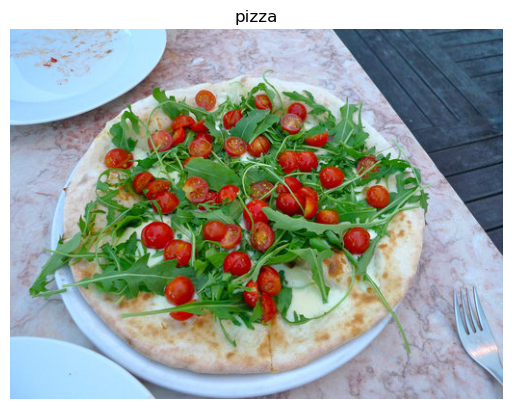

In [4]:
show_random_image("train", "pizza")

In [5]:
def get_smallest_shape(target_dir: str, target_class:str):
    image_dir = "pizza_steak/" + target_dir + "/" + target_class
    shapes = [mpimg.imread(image_dir + "/" +i).shape for i in os.listdir(image_dir)]
    smallest = np.argmin([i[0] + i[1] for i in shapes])
    return shapes[smallest]

In [6]:
s_tr_st = get_smallest_shape("train", "steak")
s_tr_pi = get_smallest_shape("train", "pizza")
s_te_st = get_smallest_shape("test", "steak")
s_te_pi = get_smallest_shape("test", "pizza")

s_tr_st, s_tr_pi, s_te_st, s_te_pi

((254, 512, 3), (287, 512, 3), (512, 287, 3), (288, 512, 3))

## Creating The CNN:

In [7]:
# Importing Necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-15 16:04:39.885796: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 16:04:40.200989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preprocessing the Data and Data Augmentation

In [8]:
# Set the Seed
tf.random.set_seed(7)

# Data Normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setting up the paths to our Directories
train_path = "./pizza_steak/train"
valid_path = "./pizza_steak/test"

# Importing the Data from our Directories
train_data = train_datagen.flow_from_directory(
    directory = train_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed = 7
)
valid_data = valid_datagen.flow_from_directory(
    directory = valid_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed = 7
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


###  Building A CNN Model

In [9]:
# Build
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit
history_1 = model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data= valid_data,
            validation_steps= len(valid_data)
           )

Epoch 1/5
47/47 [==============================] - 26s 505ms/step - loss: 0.5626 - accuracy: 0.6967 - val_loss: 0.5014 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4472 - accuracy: 0.7907 - val_loss: 0.3515 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 24s 500ms/step - loss: 0.3978 - accuracy: 0.8280 - val_loss: 0.3453 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 24s 516ms/step - loss: 0.3676 - accuracy: 0.8420 - val_loss: 0.3454 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 24s 509ms/step - loss: 0.3245 - accuracy: 0.8727 - val_loss: 0.4268 - val_accuracy: 0.7980


In [10]:
# Get the model's summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Building Another CNN


In [11]:

# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [12]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 29s 587ms/step - loss: 1.7179 - accuracy: 0.6247 - val_loss: 0.5194 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4803 - accuracy: 0.7833 - val_loss: 0.4352 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 24s 502ms/step - loss: 0.3676 - accuracy: 0.8580 - val_loss: 0.4788 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.2344 - accuracy: 0.9167 - val_loss: 0.4331 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 24s 499ms/step - loss: 0.1127 - accuracy: 0.9620 - val_loss: 0.4403 - val_accuracy: 0.8180


## Model Evaluation

In [13]:
# Evaluation
model_4.evaluate(valid_data)

16/16 [==============================] - 5s 280ms/step - loss: 0.4403 - accuracy: 0.8180


[0.4402677118778229, 0.8180000185966492]

In [52]:
# plotting resuslts with a function
def plot_training_curves(history: dict, smoothen=False):
    epochs = range(1, len(history["loss"])+1)
    loss = history["loss"]
    val_loss = history["val_loss"]
    accuracy = history["accuracy"]
    val_accuracy = history["val_accuracy"]
    if smoothen == True:
        from scipy.interpolate import make_interp_spline
        plt.figure()
        epochs_ = np.linspace(epochs[0], epochs[-1], 100)
        ## LOSS CURVE##
        plt.subplot(1,2,1)
        plt.title("Smooth Loss Curve")
        #Create Splines
        train_loss_spline = make_interp_spline(epochs, loss)
        val_loss_spline = make_interp_spline(epochs, val_loss)
        
        #Create smooth curves
        train_loss_ = train_loss_spline(epochs_)
        val_loss_ = val_loss_spline(epochs_)
        
        
        plt.plot(epochs_, train_loss_, label="Training Loss")
        plt.plot(epochs_, val_loss_, label="Validation Loss")
        ## LOSS CURVE##
        plt.subplot(1,2,2)
        plt.title("Smooth Accuracy Curve")
        #Create Splines
        train_acc_spline = make_interp_spline(epochs, accuracy)
        val_acc_spline = make_interp_spline(epochs, val_accuracy)
        
        #Create smooth curves
        train_acc_ = train_acc_spline(epochs_)
        val_acc_ = val_acc_spline(epochs_)
        
        
        plt.plot(epochs_, train_acc_, label="Training Accuracy")
        plt.plot(epochs_, val_acc_, label="Validation Accuracy")
        
        plt.legend()
        plt.show()
                        
    else:                    
        plt.figure()
        plt.subplot(1,2,1)
        plt.title("Loss Curve")
        plt.plot(epochs, loss, label="Training Loss")
        plt.plot(epochs, val_loss, label="Validation Loss")
        plt.subplot(1,2,2)
        plt.title("Accuracy Curve")
        plt.plot(epochs, accuracy, label="Training Accuracy")
        plt.plot(epochs, val_accuracy, label="Validation Accuracy")
        plt.legend()
        plt.show()

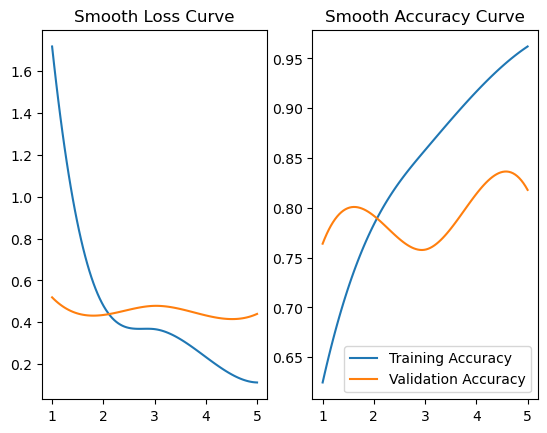

In [53]:
plot_training_curves(history_4.history, smoothen=True)

### Adjust the Model parameters

0. Create a Baseline
11. Beat the Baseline by overfitting

# Creating a Better Model:
* + MaxPooling
* + DataAugmentation

In [17]:
# Data Augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)
test_data = valid_data

In [56]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode="binary",
    shuffle = True
)

Found 1500 images belonging to 2 classes.


Text(0.5, 1.0, 'steak')

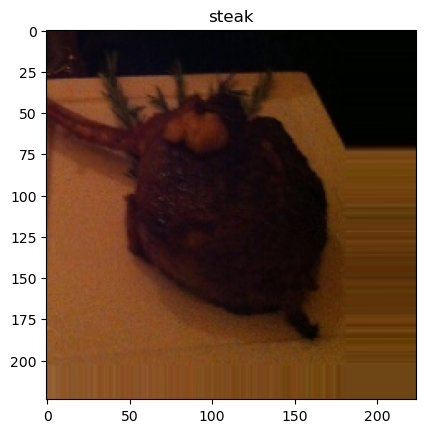

In [57]:
import random
aug_images, aug_labels = train_data_augmented.next()


random_number = random.randint(0,32)
plt.imshow(aug_images[random_number])
plt.title("pizza" if aug_labels[random_number]==0.0 else "steak")

In [58]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 48s 996ms/step - loss: 0.6698 - accuracy: 0.5760 - val_loss: 0.6203 - val_accuracy: 0.6420
Epoch 2/5
47/47 [==============================] - 48s 1s/step - loss: 0.6063 - accuracy: 0.6713 - val_loss: 0.5044 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 44s 941ms/step - loss: 0.5390 - accuracy: 0.7247 - val_loss: 0.5383 - val_accuracy: 0.7080
Epoch 4/5
47/47 [==============================] - 39s 828ms/step - loss: 0.5247 - accuracy: 0.7373 - val_loss: 0.4133 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 39s 833ms/step - loss: 0.4997 - accuracy: 0.7593 - val_loss: 0.4525 - val_accuracy: 0.7900


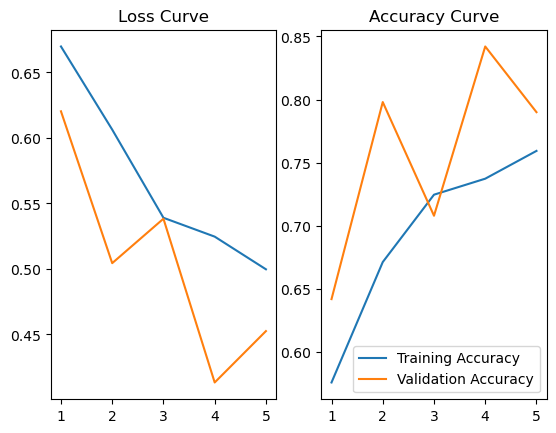

In [62]:
import pandas as pd
plot_training_curves(history_6.history)